In [36]:
# import os
# path = "w:/tmp/autoencoder5-13/"
# os.mkdir(path)

FileNotFoundError: [Errno 2] No such file or directory: 'w:/tmp/autoencoder5-13/'

In [38]:
# !pip install jsonschema==3.0.1

    100% |████████████████████████████████| 61kB 487kB/s ta 0:00:01
  Found existing installation: jsonschema 2.6.0
    Uninstalling jsonschema-2.6.0:
      Successfully uninstalled jsonschema-2.6.0
You are using pip version 19.1.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [ ]:
# model.fit(train_data, train_labels, validation_split=0.2, epochs=3)

# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
# model = Sequential()

In [21]:
# # First layer
# model.add(Dense(10, activation='relu', input_shape=(784,)))

# # Second layer
# model.add(Dense(10, activation='relu'))

# # Output layer
# model.add(Dense(2, activation='softmax'))

In [19]:
# # from keras.models import Sequential
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense

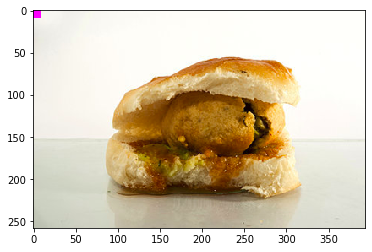

In [7]:
# # Set the red channel in this part of the image to 1
# data[:10, :10, 0] = 1

# # Set the green channel in this part of the image to 0
# data[:10, :10, 1] = 1

# # Set the blue channel in this part of the image to 0
# data[:10, :10, 2] = 0

# # Visualize the result
# plt.imshow(data)
# plt.show()

In [10]:
# plt.show()

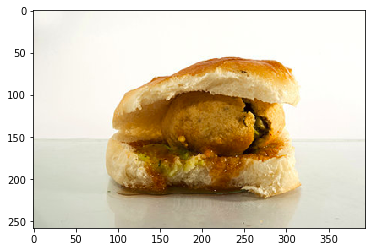

In [9]:
# plt.imshow(data)

In [8]:
# data = plt.imread('v1.png')

In [1]:
# import matplotlib.pyplot as plt

In [45]:
# !pip install pillow

# !pip install opencv

  ERROR: Could not find a version that satisfies the requirement opencv (from versions: none)
ERROR: No matching distribution found for opencv
You should consider upgrading via the 'pip install --upgrade pip' command.


In [57]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
from tensorflow.keras import optimizers
from tensorflow.keras import backend as K


In [58]:
# dimensions of our images.
img_width, img_height = 150, 150

train_data_dir = 'data/train'
validation_data_dir = 'data/validation'

In [59]:
# used to rescale the pixel values from [0, 255] to [0, 1] interval
datagen = ImageDataGenerator(rescale=1./255)

# automagically retrieve images and their classes for train and validation sets
train_generator = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=11,
        class_mode='binary')

validation_generator = datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=11,
        class_mode='binary')

Found 43 images belonging to 1 classes.
Found 22 images belonging to 1 classes.


In [60]:
# from tensorflow.keras import backend as K
K.set_image_data_format('channels_last')
K.image_data_format()

'channels_last'

In [74]:
model = Sequential()
model.add(Convolution2D(32, 3, 3, input_shape=(img_width, img_height,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.summary()
model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.summary()
model.add(Convolution2D(128, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(1, 1)))
model.summary()
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 50, 50, 32)        896       
_________________________________________________________________
activation_25 (Activation)   (None, 50, 50, 32)        0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 25, 25, 32)        0         
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 50, 50, 32)        896       
_________________________________________________________________
activation_25 (Activation)   (None, 50, 50, 32)        0         
_________________________________________________________________
max_pooling2

In [75]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [76]:
nb_epoch = 2
batch_size = 10
nb_train_samples = 43
nb_validation_samples = 22

In [77]:
model.fit_generator(
        train_generator,
        steps_per_epoch=nb_train_samples//batch_size,
        epochs=nb_epoch,
        validation_data=validation_generator,
        validation_steps=nb_validation_samples//batch_size)

Epoch 1/2
4/4 [==============================] - 2s 407ms/step - loss: 0.2331 - acc: 1.0000 - val_loss: 0.0044 - val_acc: 1.0000
Epoch 2/2
4/4 [==============================] - 0s 77ms/step - loss: 0.0054 - acc: 1.0000 - val_loss: 9.5402e-04 - val_acc: 1.0000


In [78]:
model.save_weights('basic_cnn.h5')

In [79]:
# model.load_weights('basic_cnn.h5')

In [80]:
model.evaluate_generator(validation_generator, nb_validation_samples)

[0.0009540178937392986, 1.0]

In [81]:
img_pred = image.load_img('data/check/4.png',target_size = (img_width, img_height))
img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred, axis = 0)

In [82]:
result = model.predict(img_pred)
print(result)
if result[0][0] == 1:
    print('Vada Pao!')
else:
    print('Not Vada Pao!')

[[0.]]
Not Vada Pao!
